# **TASK 02 : CREDIT CARD FRAUD DETECTION**

### Mounting Google Drive

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

### Importing Libraries for Outlier Detection

In [102]:
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

### Reading our Dataset

In [103]:
import pandas as pd
df= pd.read_csv(r"/content/drive/MyDrive/Brainwave_Matrix_Intern/Task 02/creditcard_2023.csv")

In [104]:
df.head(20)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,0.451788,0.036071,0.877239,-0.289721,0.630992,0.560201,0.741132,0.421766,0.362504,-0.242749,-0.076400,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,-1.735016,0.523425,-0.693622,0.796567,0.011268,0.228270,0.441584,-0.032928,-0.253447,-0.390343,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,-1.039421,0.822749,1.853521,0.176637,0.769514,0.420403,0.112419,0.101156,0.058925,-0.324758,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,0.437518,-1.107172,0.548485,-0.216078,0.742616,-0.394408,0.345913,0.291580,0.397063,0.259345,-0.109164,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,0.453469,-0.096412,1.316902,1.097693,0.491384,0.124451,1.018496,0.280404,0.668091,0.163294,0.043428,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


### Data Analysis

In [105]:
df.shape

(568630, 31)

#### Checking Null Values

In [106]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Checking the distribution of Normal and Fraud cases in our Data Set

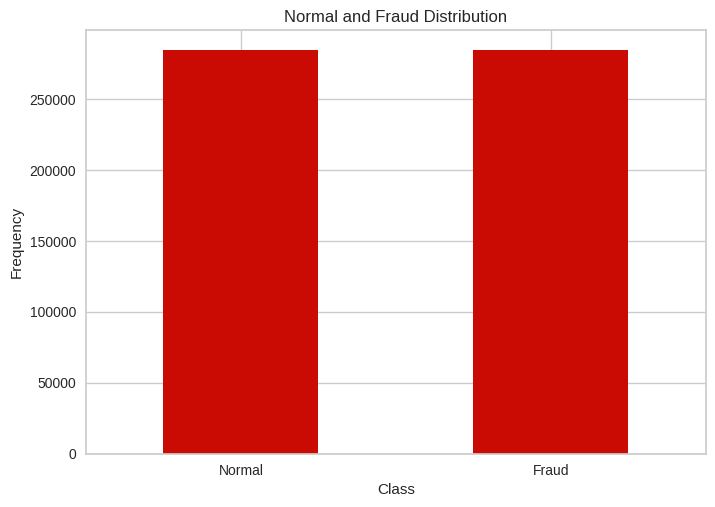

In [107]:
fraud_check = pd.value_counts(df['Class'], sort = True)
fraud_check.plot(kind = 'bar', rot=0, color= 'r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
labels= ['Normal','Fraud']
plt.xticks(range(2), labels)
plt.show()

In [108]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [109]:
fraud_people.shape

(284315, 31)

In [110]:
normal_people.shape

(284315, 31)

#### Finding out the avg amount in our both the data sets

In [111]:
fraud_people['Amount'].describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [112]:
normal_people['Amount'].describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

#### Let us analyse it visually

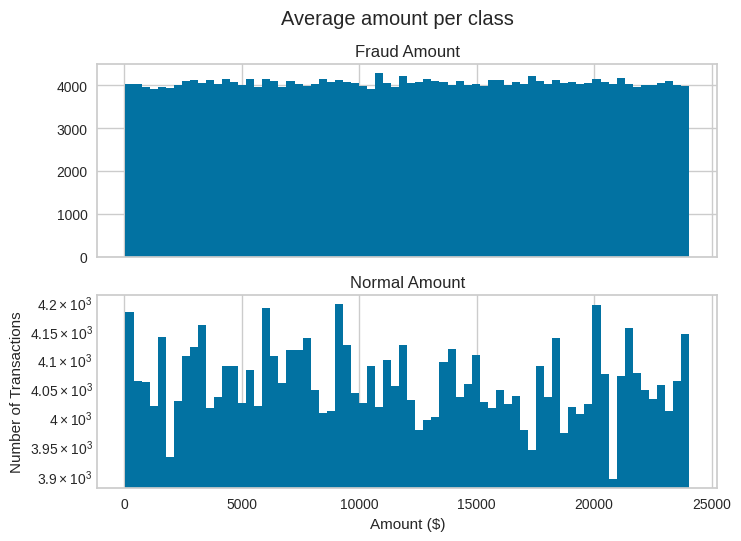

In [113]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

#### Plotting a corr Heatmap

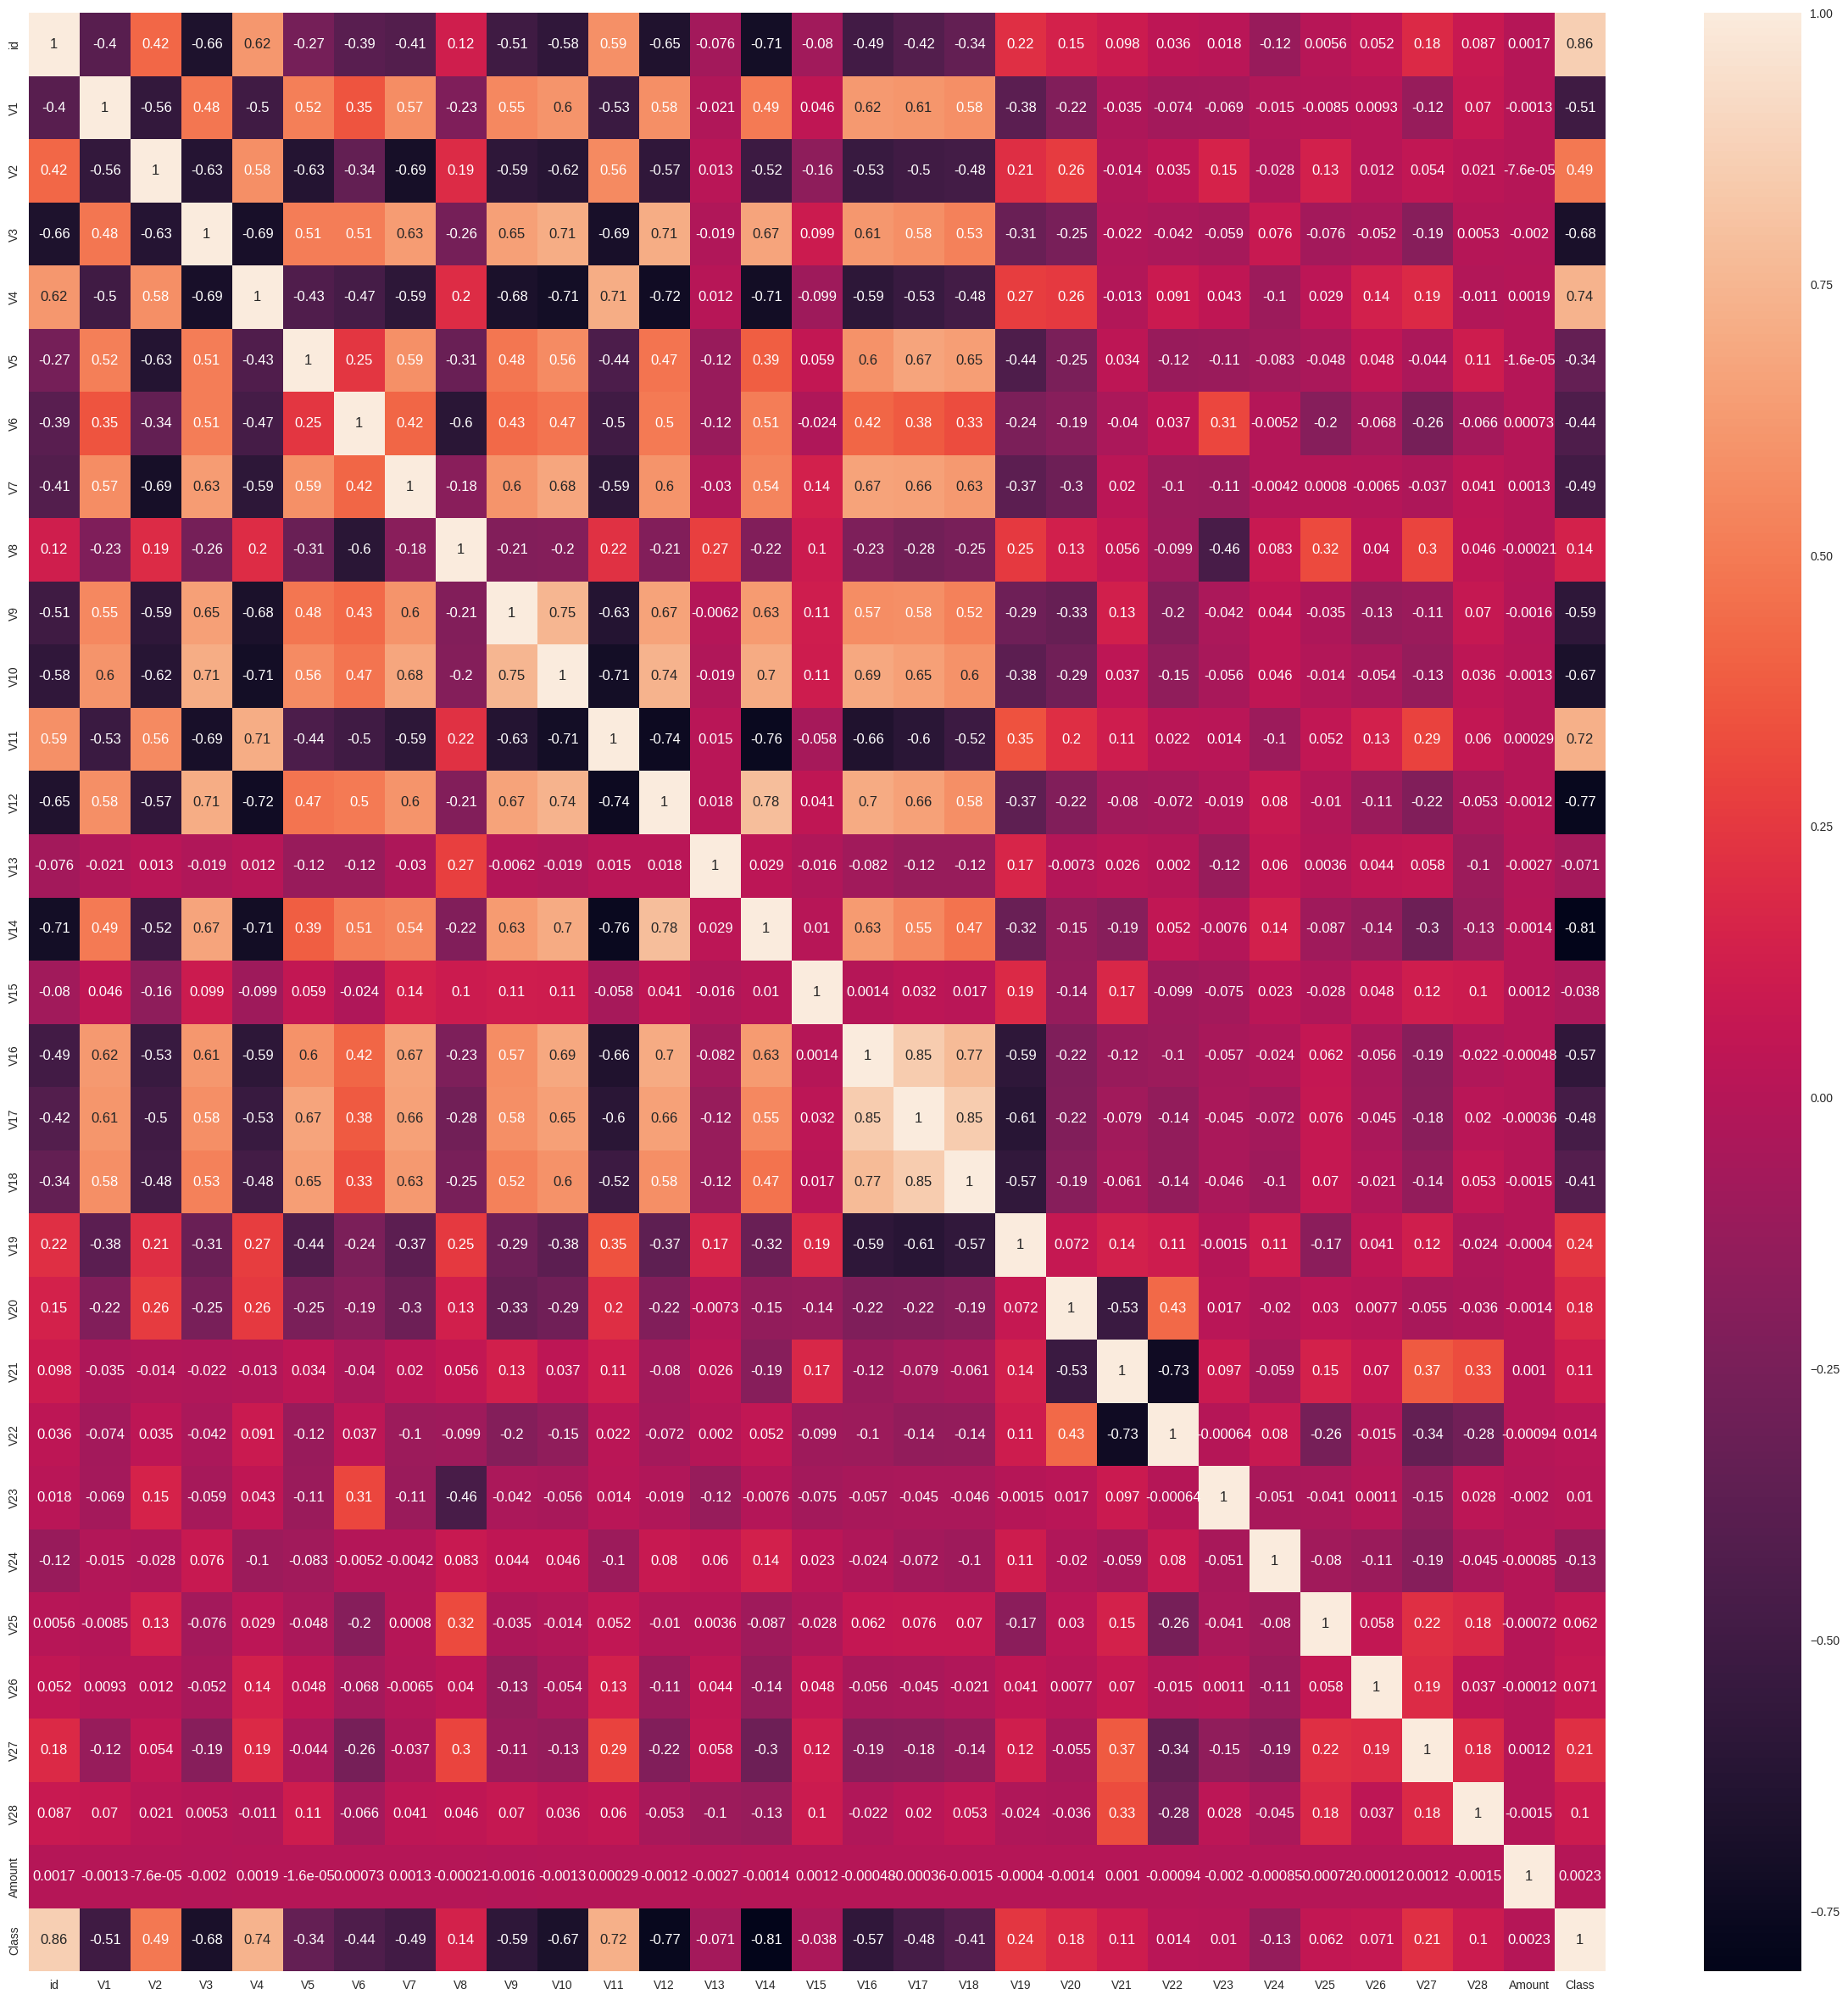

In [114]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

### Creating our Dependent and Independent Features

In [115]:
columns = df.columns.tolist()
columns = [var for var in columns if var not in ["Class"]]
target = "Class"
x= df[columns]
y= df[target]

In [116]:
x.shape

(568630, 30)

In [117]:
y.shape

(568630,)

In [118]:
x.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,0.451788,0.036071,0.877239,-0.289721,0.630992,0.560201,0.741132,0.421766,0.362504,-0.242749,-0.076400,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,-1.735016,0.523425,-0.693622,0.796567,0.011268,0.228270,0.441584,-0.032928,-0.253447,-0.390343,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,-1.039421,0.822749,1.853521,0.176637,0.769514,0.420403,0.112419,0.101156,0.058925,-0.324758,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,0.437518,-1.107172,0.548485,-0.216078,0.742616,-0.394408,0.345913,0.291580,0.397063,0.259345,-0.109164,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,0.453469,-0.096412,1.316902,1.097693,0.491384,0.124451,1.018496,0.280404,0.668091,0.163294,0.043428,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35


In [119]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

## Model building

### Splitting the data

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

### We wil be using Isolation Forest Model for our Anamoly Detection:


## Isolation Forest

In [121]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)

In [122]:
iso_forest.fit(x_train,y_train)

IsolationForest(bootstrap=False, contamination='auto', max_features=1.0,
                max_samples=398041, n_estimators=100, n_jobs=None,
                random_state=0, verbose=0, warm_start=False)

In [123]:
ypred= iso_forest.predict(x_test)

In [124]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

#### Mapping the values as we want to have an output in 0 and 1

In [125]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1


### Accuracy score and Matrix

In [126]:
print(accuracy_score(y_test,ypred))

0.5002432747715269


In [127]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     85149
           1       0.71      0.00      0.01     85440

    accuracy                           0.50    170589
   macro avg       0.60      0.50      0.34    170589
weighted avg       0.60      0.50      0.34    170589



In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion_matrix(y_test, ypred)

array([[85019,   130],
       [85123,   317]])